In [1]:
#requirements
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
from matplotlib import dates as d

In [2]:
filepath = "data.csv"

Load dataset

In [4]:
data_df = pd.read_csv('data.csv', parse_dates=True)
data_df 




data_df['year'] = pd.DatetimeIndex(data_df ['datetime']).year
data_df['month'] = pd.DatetimeIndex(data_df['datetime']).month
data_df['day'] = pd.DatetimeIndex(data_df['datetime']).day
data_df['hour'] = pd.DatetimeIndex(data_df['datetime']).hour



Rearrange to have ozone at the end 

In [5]:
data_df_list = data_df.columns.tolist()
new_cols=  data_df_list[0:3] + data_df_list[4:] + data_df_list[3:4]
data_df_sorted =data_df[new_cols]

data_df_sorted

,datetime,Carbon monoxide,Nitrogen dioxide (NO2),PM2.5 - Local Conditions,Wind Direction - Resultant,Wind Speed - Resultant,Outdoor Temperature,Relative Humidity,Solar radiation,Ultraviolet radiation,Barometric pressure,latitude,longitude,year,month,day,hour,Ozone
0,2018-01-01 00:00:00,1.4490,27.2,61.4,49.0,3.2,51.8,87.0,0.0,0.0,1009.0,34.06659,-118.22688,2018,1,1,0,0.002
1,2018-01-01 01:00:00,1.5300,27.8,NaN,35.0,2.9,51.4,84.0,0.0,0.0,1009.0,34.06659,-118.22688,2018,1,1,1,0.001
2,2018-01-01 02:00:00,1.4680,27.9,NaN,43.0,3.8,50.9,81.0,0.0,0.0,1009.0,34.06659,-118.22688,2018,1,1,2,0.002
3,2018-01-01 03:00:00,1.4590,28.7,NaN,38.0,3.9,50.3,81.0,0.0,0.0,1009.0,34.06659,-118.22688,2018,1,1,3,0.001
4,2018-01-01 04:00:00,1.4395,27.9,NaN,36.0,4.2,49.5,79.0,0.0,0.0,1009.0,34.06659,-118.22688,2018,1,1,4,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-12-31 19:00:00,0.6230,32.4,NaN,32.0,1.8,55.4,15.0,0.0,0.0,999.0,34.06659,-118.22688,2018,12,31,19,0.007
8756,2018-12-31 20:00:00,0.8230,34.0,NaN,25.0,2.0,52.4,19.0,0.0,0.0,1000.0,34.06659,-118.22688,2018,12,31,20,0.003
8757,2018-12-31 21:00:00,0.7425,31.7,NaN,30.0,2.3,51.7,18.0,0.0,0.0,1001.0,34.06659,-118.22688,2018,12,31,21,0.005
8758,2018-12-31 22:00:00,0.3305,7.8,NaN,48.0,2.3,53.7,12.0,0.0,0.0,1002.0,34.06659,-118.22688,2018,12,31,22,0.030


need to figure out what to do with na's still; contradicting information from various sources; currently dropping pm2.5 because too many nan's

In [6]:
df = data_df_sorted.drop('PM2.5 - Local Conditions',1)
df = df.dropna()

drop datetime; no longer needed 

In [7]:
df = df.drop('datetime',1)


select features 

In [8]:
feature_set = df.iloc[:,:15].values
z1 = pd.DataFrame(feature_set)

y1 = df.iloc[:,15:16].values
z2 = pd.DataFrame(y1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [10]:
x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)

In [140]:
from math import sqrt
from sklearn import metrics

def rmslog_error(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]


In [139]:

# multiple linear regression model
mult_lin_reg = LinearRegression()
mult_lin_reg.fit(x_train,y_train)

mult_lin_reg_y_pred = mult_lin_reg.predict(x_test)

rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mult_lin_reg_y_pred))
mae_mlr = metrics.mean_absolute_error(y_test, mult_lin_reg_y_pred)
r2_mlr = metrics.r2_score(y_test,mult_lin_reg_y_pred)
rmslog_error_mlr = rmslog_error(y_test,mult_lin_reg_y_pred)

mlr_rmse = sqrt(metrics.mean_squared_error(y_train, mult_lin_reg.predict(x_train)))
mlr_mae = metrics.mean_absolute_error(y_train, mult_lin_reg.predict(x_train))
mlr_r2 = metrics.r2_score(y_train, mult_lin_reg.predict(x_train))
m1 = mult_lin_reg.predict(x_train)
mlr_rmslog_error = rmslog_error(y_train, m1)

In [138]:
# polynomial regression model
# degree = 2

poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)

pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmslog_error_pr = rmslog_error(y_test,pr_y_predict)

pr_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_rmslog_error = rmslog_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))

In [137]:
#-----------------------------------------------
# decision tree regression model

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_predict = dec_tree.predict(x_test)

rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_predict)
r2_dt = metrics.r2_score(y_test,dt_predict)
rmslog_error_dt = rmslog_error(y_test,dt_predict)

dt_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))
dt_rmslog_error = rmslog_error(y_train, dec_tree.predict(x_train))

In [136]:

# random forest regression model

rf_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_reg.fit(x_train,y_train)
rf_predict = rf_reg.predict(x_test)

rmse_rf = sqrt(metrics.mean_squared_error(y_test, rf_predict))
mae_rf = metrics.mean_absolute_error(y_test, rf_predict)
r2_rf = metrics.r2_score(y_test,rf_predict)
rmslog_error_rf = rmslog_error(y_test,rf_predict)

rf_rmse = sqrt(metrics.mean_squared_error(y_train, rf_reg.predict(x_train)))
rf_mae = metrics.mean_absolute_error(y_train, rf_reg.predict(x_train))
rf_r2 = metrics.r2_score(y_train, rf_reg.predict(x_train))
rf_rmslog_error = rmslog_error(y_train, rf_reg.predict(x_train))


/var/folders/86/7p6zt3rd1jz7gwd3wmbkzcw80000gn/T/ipykernel_17186/2852382963.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rt_reg.fit(x_train,y_train)


In [141]:

print("training data:")
print("model\tR^2\tRMSE\tMAE\trmslog_error")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(mlr_r2,mlr_rmse,mlr_mae,mlr_rmslog_error))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(pr_r2,pr_rmse,pr_mae,pr_rmslog_error))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(dt_r2,dt_rmse,dt_mae,dt_rmslog_error))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(rf_r2,rf_rmse,rf_mae,rf_rmslog_error))

print("testing data:")
print("model\tR^2\tRMSE\tMAE\trmslog_error")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmslog_error_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmslog_error_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmslog_error_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmslog_error_rt))



training data:
model	R^2	RMSE	MAE	rmslog_error
MLR	0.8055	0.0077	0.0058	0.0074
PR	0.89	0.01	0.004	0.0055
DTR	1.0000	0.0000	0.0000	0.0000
RFR	0.9899	0.0018	0.0012	0.0017
testing data:
model	R^2	RMSE	MAE	rmslog_error
MLR	0.8031	0.0079	0.0060	0.0076
PR	0.88	0.01	0.005	0.0058
DTR	0.8317	0.0073	0.0048	0.0071
RFR	0.9282	0.0048	0.0033	0.0046


In [148]:
from sklearn.feature_selection import SelectFromModel


rf_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rf_reg.fit(x_train,y_train)
rf_reg.feature_importances_
rt_predict = rf_reg.predict(x_test)



/var/folders/86/7p6zt3rd1jz7gwd3wmbkzcw80000gn/T/ipykernel_17186/2992604870.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(x_train,y_train)


In [149]:
print(rf_reg.feature_importances_)

[0.03775328 0.44517092 0.05956498 0.05021235 0.04120434 0.16291068
 0.1260335  0.00473145 0.00868558 0.         0.         0.
 0.01678341 0.01218229 0.03476721]


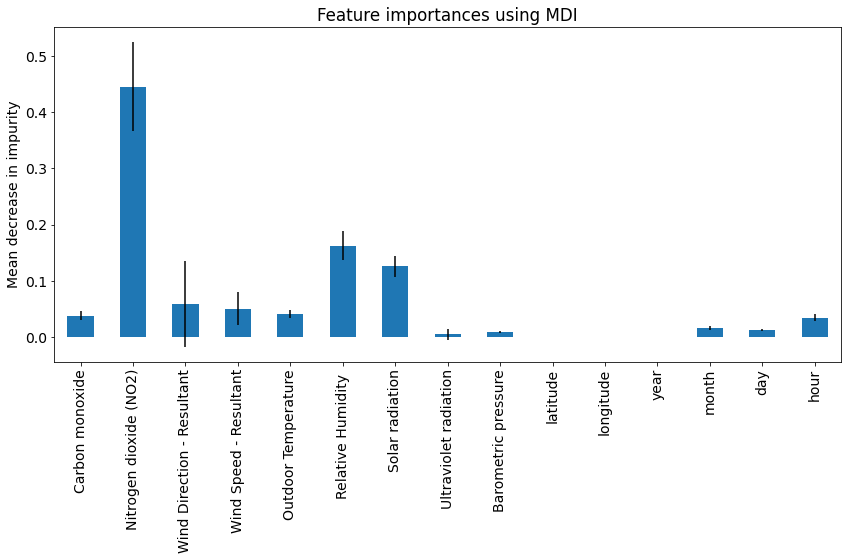

In [163]:
import pandas as pd
importances = rf_reg.feature_importances_
feature_names = ['Carbon monoxide', 'Nitrogen dioxide (NO2)',
       'Wind Direction - Resultant', 'Wind Speed - Resultant',
       'Outdoor Temperature', 'Relative Humidity ', 'Solar radiation',
       'Ultraviolet radiation', 'Barometric pressure', 'latitude', 'longitude',
       'year', 'month', 'day', 'hour']

forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [165]:
# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(forest_importances):
    perc = importance*100
    print(f"Feature {feature_names[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")


Feature Carbon monoxide has    3.78% of the decision-making importance.
Feature Nitrogen dioxide (NO2) has   44.52% of the decision-making importance.
Feature Wind Direction - Resultant has    5.96% of the decision-making importance.
Feature Wind Speed - Resultant has    5.02% of the decision-making importance.
Feature Outdoor Temperature has    4.12% of the decision-making importance.
Feature Relative Humidity  has   16.29% of the decision-making importance.
Feature Solar radiation has   12.60% of the decision-making importance.
Feature Ultraviolet radiation has    0.47% of the decision-making importance.
Feature Barometric pressure has    0.87% of the decision-making importance.
Feature     latitude has    0.00% of the decision-making importance.
Feature    longitude has    0.00% of the decision-making importance.
Feature         year has    0.00% of the decision-making importance.
Feature        month has    1.68% of the decision-making importance.
Feature          day has    1.22% 

<BarContainer object of 15 artists>

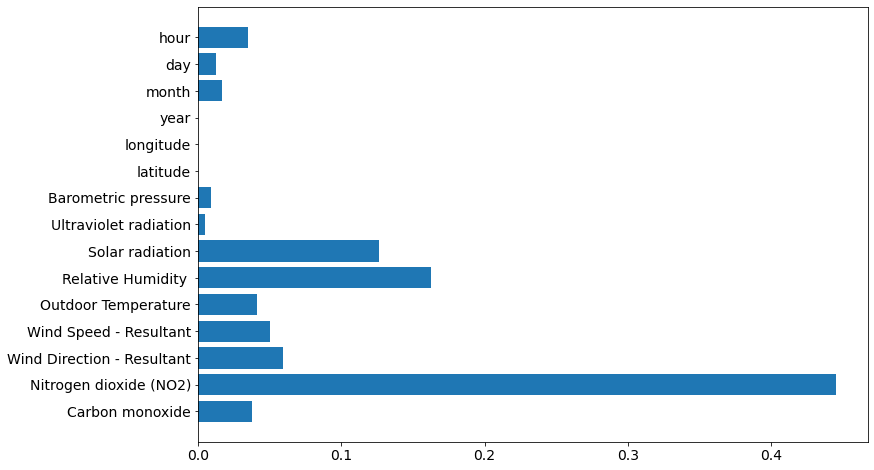

In [164]:
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(feature_names,importances)